In [1]:
!pip install pystan

In [2]:
!python -m pip install prophet #Facebook Prophet model

In [3]:
import prophet

In [4]:
dir(prophet) #in-built functions in prophet model

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [5]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [6]:
df = pd.read_csv('/content/airline_passengers.csv')
df

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [10]:
df.describe()

,Month,Thousands of Passengers
count,144,144.000000
mean,1954-12-16 05:00:00,280.298611
min,1949-01-01 00:00:00,104.000000
25%,1951-12-24 06:00:00,180.000000
50%,1954-12-16 12:00:00,265.500000
75%,1957-12-08 18:00:00,360.500000
max,1960-12-01 00:00:00,622.000000
std,NaN,119.966317


In [11]:
df.nunique()

Month                      144
Thousands of Passengers    118
dtype: int64

In [12]:
df_prophet = df.rename(columns={'Month':'ds','Thousands of Passengers':'y'})
df_prophet

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [13]:
from prophet import Prophet

In [14]:
m = Prophet()

In [15]:
model = m.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc2is0ayh/damyv8sf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc2is0ayh/2wuxhunc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14343', 'data', 'file=/tmp/tmpc2is0ayh/damyv8sf.json', 'init=/tmp/tmpc2is0ayh/2wuxhunc.json', 'output', 'file=/tmp/tmpc2is0ayh/prophet_model2i6zrrg_/prophet_model-20240516133648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:36:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:36:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [17]:
future_global = model.make_future_dataframe(periods=61,freq='M')
future_global

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
200,1965-08-31
201,1965-09-30
202,1965-10-31
203,1965-11-30


# Prediction

In [18]:
prediction = model.predict(future_global)

In [19]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,58.408992,113.570859,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,50.825744,107.012919,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,84.780814,139.914285,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,79.873052,137.440497,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,83.016455,140.567116,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1965-08-31,660.006451,648.100093,708.462820,653.409590,666.563077,17.966322,17.966322,17.966322,17.966322,17.966322,17.966322,0.0,0.0,0.0,677.972773
201,1965-09-30,663.037079,611.995265,669.452288,656.294049,669.839602,-22.313436,-22.313436,-22.313436,-22.313436,-22.313436,-22.313436,0.0,0.0,0.0,640.723643
202,1965-10-31,666.168728,582.695524,641.775177,659.287906,673.082851,-55.203456,-55.203456,-55.203456,-55.203456,-55.203456,-55.203456,0.0,0.0,0.0,610.965273
203,1965-11-30,669.199356,610.927474,671.473143,662.161274,676.282293,-28.605181,-28.605181,-28.605181,-28.605181,-28.605181,-28.605181,0.0,0.0,0.0,640.594175


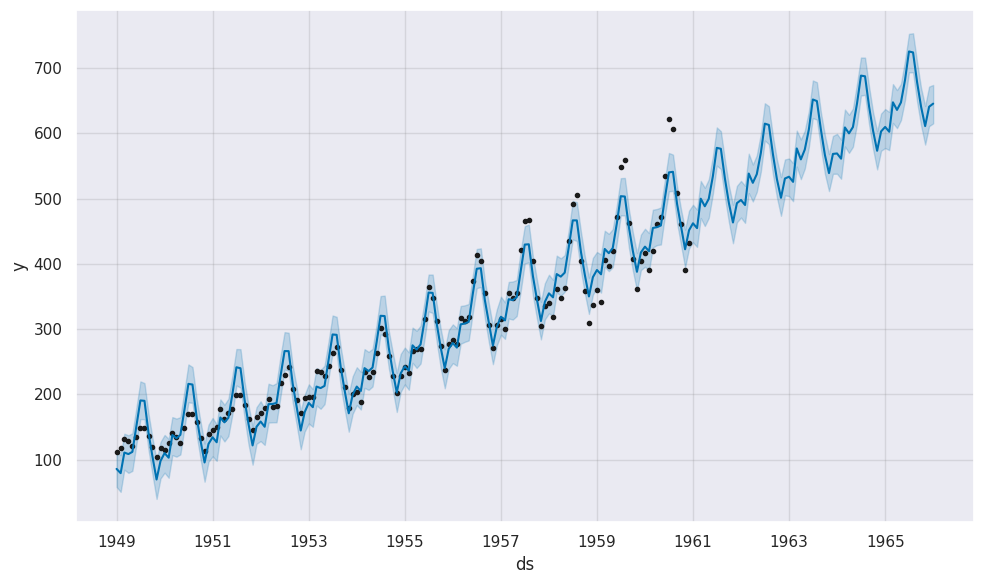

In [20]:
#plot the model
model.plot(prediction)
plt.show()

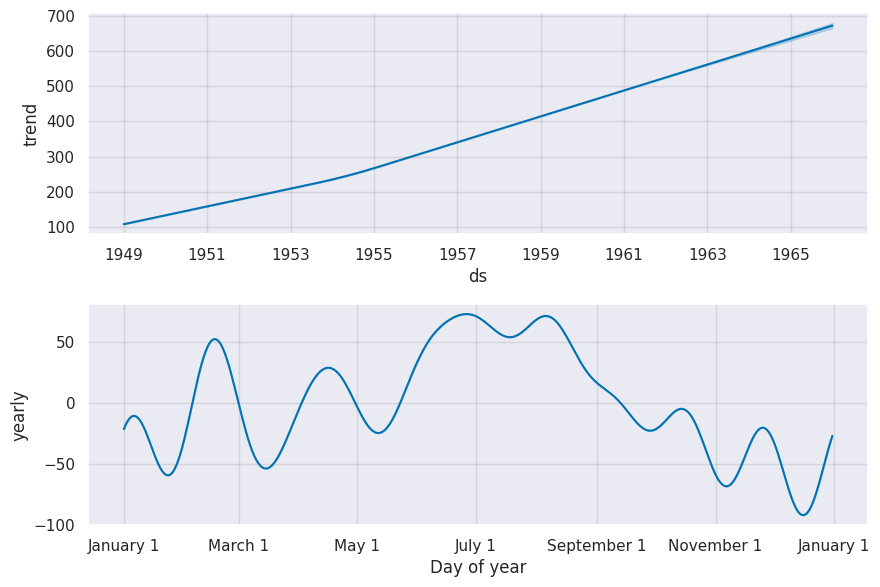

In [21]:
model.plot_components(prediction)
plt.show()

In [22]:
from prophet.plot import add_changepoints_to_plot

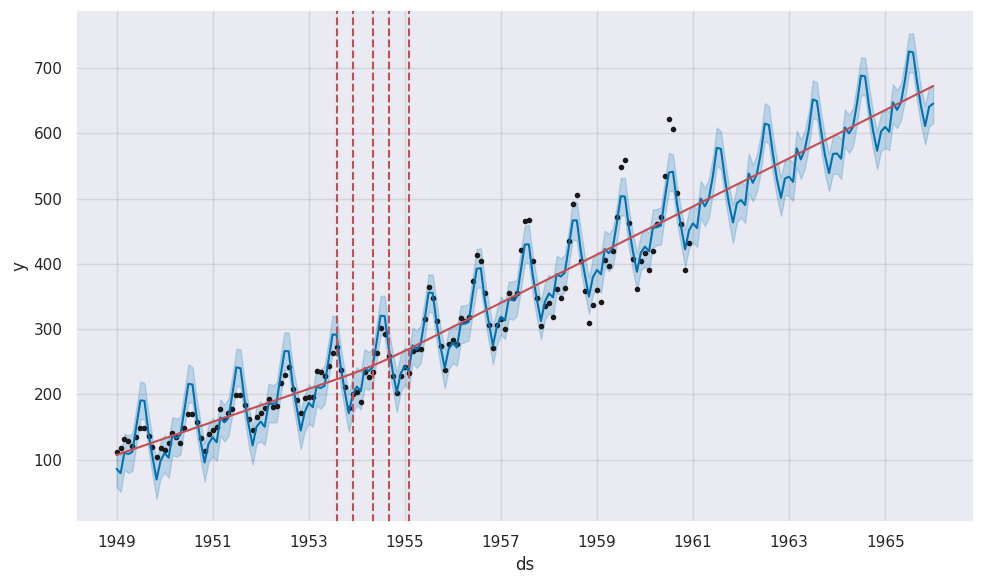

In [23]:
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(),model,prediction)
plt.show()

In [24]:
from prophet.diagnostics import cross_validation

In [25]:
df_cv = cross_validation(model,horizon='60 days',period='30 days',initial='90 days')

INFO:prophet:Making 141 forecasts with cutoffs between 1949-04-03 00:00:00 and 1960-10-02 00:00:00


  0%|          | 0/141 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc2is0ayh/j3i46s7_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc2is0ayh/gl4a8qg9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20560', 'data', 'file=/tmp/tmpc2is0ayh/j3i46s7_.json', 'init=/tmp/tmpc2is0ayh/gl4a8qg9.json', 'output', 'file=/tmp/tmpc2is0ayh/prophet_modelucpn1drc/prophet_model-20240516133652.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:36:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:36:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc2is0ayh/fhfe0auj.json
DEBUG:cmdstanpy:input tempfile

In [26]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1949-05-01,619.237536,619.237535,619.237536,121,1949-04-03
1,1949-06-01,5.162364,5.162362,5.162366,135,1949-04-03
2,1949-06-01,1847.091658,1847.091656,1847.091659,135,1949-05-03
3,1949-07-01,755.050316,755.050311,755.050321,148,1949-05-03
4,1949-07-01,-1341.193799,-1341.193799,-1341.193799,148,1949-06-02
...,...,...,...,...,...,...
273,1960-10-01,457.502083,429.986312,485.026456,461,1960-08-03
274,1960-10-01,458.482656,430.853052,483.904331,461,1960-09-02
275,1960-11-01,430.151256,402.470049,460.346294,390,1960-09-02
276,1960-11-01,429.935506,402.165694,455.885921,390,1960-10-02


In [27]:
from prophet.diagnostics import performance_metrics

In [28]:
df_performance = performance_metrics(df_cv)

In [29]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,595362.106977,771.597114,209.734471,1.747582,0.088177,0.362010,0.259259
1,8 days,4230.358039,65.041203,38.315603,0.257483,0.084024,0.238886,0.259259
2,9 days,1461.251338,38.226317,24.338538,0.136382,0.073186,0.158919,0.244444
3,10 days,1441.344715,37.965046,24.070396,0.131333,0.063879,0.154268,0.259259
4,11 days,1515.246629,38.926169,25.822205,0.129870,0.070605,0.154501,0.148148
5,12 days,1287.909293,35.887453,23.198957,0.113239,0.070605,0.141440,0.185185
6,13 days,495.877319,22.268303,16.633544,0.059587,0.062086,0.059448,0.259259
7,14 days,566.654040,23.804496,17.908320,0.060156,0.062086,0.058944,0.253086
8,15 days,623.168075,24.963335,19.444013,0.061826,0.062086,0.060784,0.222222
9,16 days,795.466920,28.204023,23.058824,0.071275,0.084191,0.070276,0.185185


In [30]:
from prophet.plot import plot_cross_validation_metric

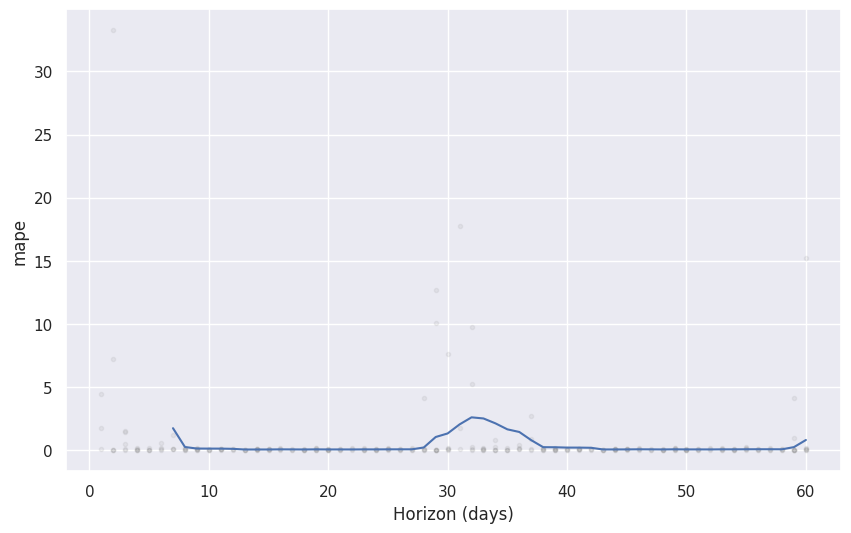

In [31]:
df_performance = plot_cross_validation_metric(df_cv, metric='mape')